In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CropData = pd.read_csv("Crop_Production.csv")
CropData.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,75,49,15,21.535741,71.509060,5.918264,102.485293,1
2,91,50,40,20.824771,84.134188,6.462392,230.224222,0
3,67,60,25,24.921622,66.786274,5.750255,109.216228,1
4,60,51,36,22.696578,82.810889,6.028322,256.996476,0


 **Exploratory Data Analysis (EDA)**

<AxesSubplot:>

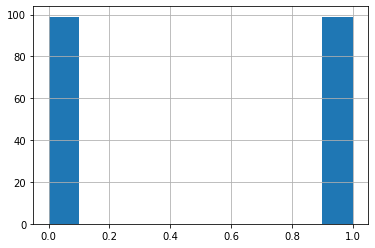

In [4]:
CropData["label"].hist()

<AxesSubplot:>

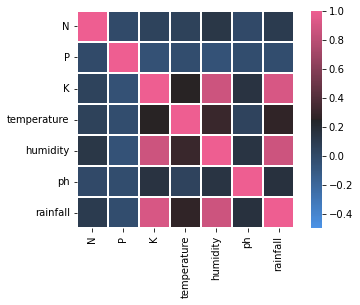

In [5]:
corr = CropData.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [7]:
CropData1 = CropData[["N", "P", "K", "label"]]
CropData1.head()

,N,P,K,label
0,90,42,43,0
1,75,49,15,1
2,91,50,40,0
3,67,60,25,1
4,60,51,36,0


<AxesSubplot:xlabel='K', ylabel='Count'>

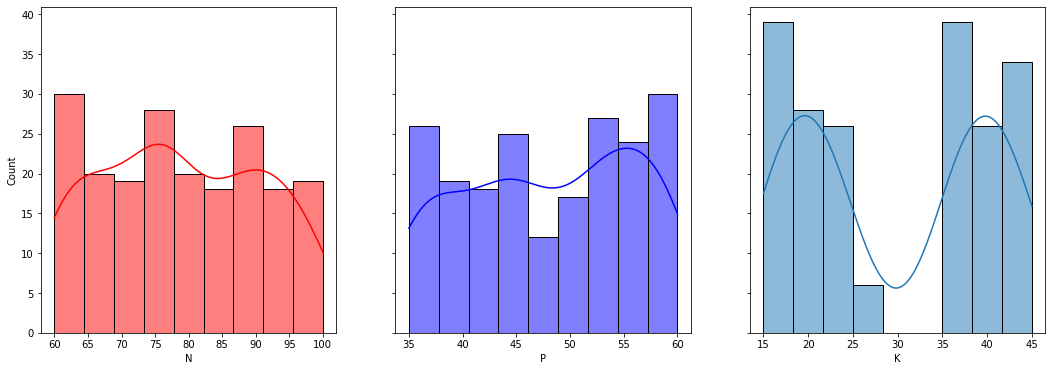

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(CropData1, ax=axes[0], x="N", kde=True, color='r')
sns.histplot(CropData1, ax=axes[1], x="P", kde=True, color='b')
sns.histplot(CropData1, ax=axes[2], x="K", kde=True)

In [11]:
CropData2 = CropData[["temperature", "humidity", "ph", "rainfall" , "label"]]
CropData2.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,0
1,21.535741,71.509060,5.918264,102.485293,1
2,20.824771,84.134188,6.462392,230.224222,0
3,24.921622,66.786274,5.750255,109.216228,1
4,22.696578,82.810889,6.028322,256.996476,0


<AxesSubplot:xlabel='rainfall', ylabel='Count'>

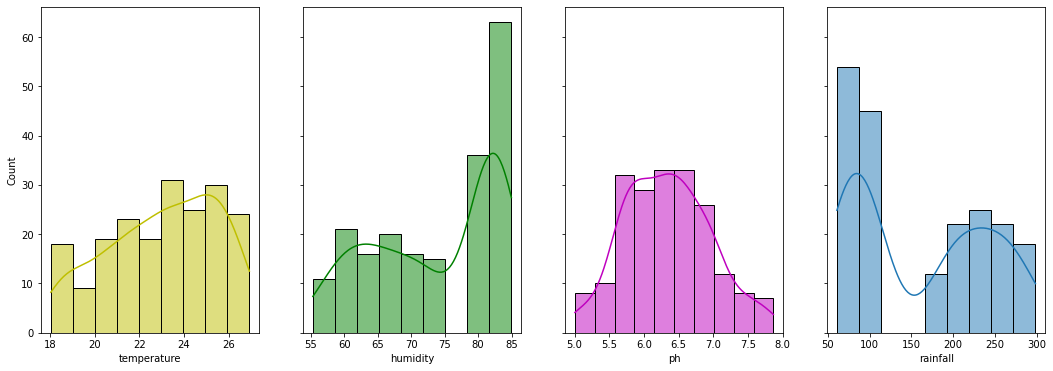

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
sns.histplot(CropData2, ax=axes[0], x="temperature", kde=True, color='y')
sns.histplot(CropData2, ax=axes[1], x="humidity", kde=True, color='g')
sns.histplot(CropData2, ax=axes[2], x="ph", kde=True, color='m')
sns.histplot(CropData2, ax=axes[3], x="rainfall", kde=True)

In [17]:
x = CropData.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,75,49,15,21.535741,71.509060,5.918264,102.485293
2,91,50,40,20.824771,84.134188,6.462392,230.224222
3,67,60,25,24.921622,66.786274,5.750255,109.216228
4,60,51,36,22.696578,82.810889,6.028322,256.996476


In [18]:
y = CropData['label']
y

0      0
1      1
2      0
3      1
4      0
      ..
193    0
194    1
195    0
196    0
197    0
Name: label, Length: 198, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [21]:
model.fit(X_train,y_train)

GaussianNB()

In [22]:
model.score(X_test,y_test)

1.0

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
model.predict_proba(X_test[:10])

array([[7.22408312e-22, 1.00000000e+00],
       [5.25381713e-60, 1.00000000e+00],
       [1.00000000e+00, 1.20956850e-26],
       [1.00000000e+00, 5.34559380e-20],
       [5.25850014e-85, 1.00000000e+00],
       [2.40852570e-25, 1.00000000e+00],
       [8.95288592e-21, 1.00000000e+00],
       [1.00000000e+00, 6.55776317e-37],
       [1.00000000e+00, 6.07479112e-35],
       [1.00000000e+00, 3.45956333e-18]])

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
#Final Report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32  0]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [28]:
# N,P,K,temperature,humidity,ph,rainfall,label
test = [[74,43,23,25.95263264,61.89082199,6.325235159,99.57981207]]

a = model.predict(test)
if a[0] ==0:
    print("rice")
else:
    print("maize")

maize


In [29]:
# N,P,K,temperature,humidity,ph,rainfall,label
test2 = [[82,43,38,23.28617173,81.43321641,5.105588355,242.3170629]]

a = model.predict(test2)
if a[0] ==0:
    print("rice")
else:
    print("maize")

rice
